# 1D J1-J2 model - Inference: 

In this notebook, we load the trained models to check the ground state energy produced by each trained model. The system size is N=50. J1 =1.0, J2 = 0.0, 0.2, 0.5, 0.8. For each (J1,J2) tuple, we train 2 models: EuclGRU and HypGRU and compare their performances. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('../utility')
from j1j2_hyprnn_wf import *
from j1j2_hyprnn_train_loop import *

2025-04-10 17:39:52.417182: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Num GPUs Available:  0


In [2]:
Ee00 =-21.97211 
Ee02 = -20.314982

Ee05 = -18.7500
Ee08 = -20.984149

In [3]:
def define_load_test(wf, weight_link):
    test_samples_before = wf.sample(50,2)
    test_gs_before = J1J2_local_energies(wf, syssize, J1, J2, Bz, 50, test_samples_before, Marshall_sign = True)
    gs_mean_b = np.mean(test_gs_before)
    gs_var_b = np.var(test_gs_before)
    print(f'Before loading weights, the ground state energy mean and variance are:')
    print(f'Mean E = {gs_mean_b}, var E = {gs_var_b}')
    print('====================================================================')
    wf.model.load_weights(weight_link)
    test_samples_after = wf.sample(50,2)
    test_gs_after = J1J2_local_energies(wf, syssize, J1, J2, Bz, 50, test_samples_after, Marshall_sign = True)
    gs_mean_a = np.mean(test_gs_after)
    gs_var_a = np.var(test_gs_after)
    
    wf.model.summary()
    print('====================================================================')
    print(f'After loading weights, the ground state energy mean and variance are:')
    print(f'Mean E = {gs_mean_a}, var E = {gs_var_a}')

In [4]:
#COMMON CONFIGS
syssize = 50
nssamples = 50
J1_ = 1.0
Bz=+0.0*np.ones(syssize)
J1=+J1_*np.ones(syssize) 

# J2=0.0

In [5]:
J2_ = 0.0
J2=+J2_*np.ones(syssize)
fname = 'N50_J2=0.0'
print(f'Exact energy for J2=0.0 is E={Ee00}')

Exact energy for J2=0.0 is E=-21.97211


## Inference: Load trained models

In [6]:
wf_egru_00 = rnn_eucl_wf(syssize, 'EuclGRU', units=75)
weight_link = f'{fname}/N50_J1=1.0|J2=0.0_EuclGRU_75_ns=50_MsTrue_checkpoint.weights.h5'
define_load_test(wf_egru_00, weight_link)

Before loading weights, the ground state energy mean and variance are:
Mean E = (12.149616241455078-0.08852175623178482j), var E = 0.10339006781578064


Model: "wf_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ eucl_gru (EuclGRU)              │ ?                      │        17,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ wf_dense_ampl (Dense)           │ (50, 2)                │           152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ wf_dense_phase (Dense)          │ (49, 2)                │           152 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,854 (69.74 KB)

 Trainable params: 17,854 (69.74 KB)

 Non-trainable params: 0 (0.00 B)

After loading weights, the ground state energy mean and variance are:
Mean E = (-21.257522583007812+0.031343236565589905j), var E = 0.5883112549781799


In [7]:
wf_hgru_00_60 = rnn_hyp_wf(syssize, 'HypGRU', 'hyp', 'id', units=60)
weight_link = f'{fname}/N50_J1=1.0|J2=0.0_HypGRU_60_id_hyp_ns=50_MsTrue_checkpoint.weights.h5'
define_load_test(wf_hgru_00_60, weight_link)

Before loading weights, the ground state energy mean and variance are:
Mean E = (11.825252532958984-0.3528830409049988j), var E = 1.1497702598571777


Model: "wf_model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hyp_gru (HypGRU)                │ ?                      │        11,340 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ wf_dense_ampl (Dense)           │ (50, 2)                │           122 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ wf_dense_phase (Dense)          │ (48, 2)                │           122 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,584 (45.25 KB)

 Trainable params: 11,584 (45.25 KB)

 Non-trainable params: 0 (0.00 B)

After loading weights, the ground state energy mean and variance are:
Mean E = (-20.334165573120117-0.006082671694457531j), var E = 0.7516675591468811


In [8]:
wf_hgru_00_75 = rnn_hyp_wf(syssize, 'HypGRU', 'hyp', 'id', units=75)
weight_link = f'{fname}/N50_J1=1.0|J2=0.0_HypGRU_75_id_hyp_ns=50_MsTrue_checkpoint.weights.h5'
define_load_test(wf_hgru_00_75, weight_link)

Before loading weights, the ground state energy mean and variance are:
Mean E = (10.607709884643555+0.33770737051963806j), var E = 2.930495500564575


Model: "wf_model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hyp_gru_1 (HypGRU)              │ ?                      │        17,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ wf_dense_ampl (Dense)           │ (50, 2)                │           152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ wf_dense_phase (Dense)          │ (48, 2)                │           152 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,854 (69.74 KB)

 Trainable params: 17,854 (69.74 KB)

 Non-trainable params: 0 (0.00 B)

After loading weights, the ground state energy mean and variance are:
Mean E = (-20.12809181213379-0.12126141786575317j), var E = 0.7943411469459534


# J2 = 0.2

In [5]:
J2_ = 0.2
J2=+J2_*np.ones(syssize)
fname = 'N50_J2=0.2'
print(f'Exact energy for J2={J2_} is E={Ee02}')

Exact energy for J2=0.2 is E=-20.314982


## Inference: Load trained models

In [9]:
#EUCLGRU_70
wf_egru_02_70 = rnn_eucl_wf(syssize, 'EuclGRU', units=70)
weight_link =f'{fname}/N50_J1=1.0|J2=0.2_EuclGRU_70_ns=50_MsTrue_checkpoint.weights.h5'
define_load_test(wf_egru_02_70, weight_link)

Before loading weights, the ground state energy mean and variance are:
Mean E = (13.836974143981934-0.0889110192656517j), var E = 0.5315019488334656


Model: "wf_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ eucl_gru (EuclGRU)              │ ?                      │        15,330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ wf_dense_ampl (Dense)           │ (50, 2)                │           142 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ wf_dense_phase (Dense)          │ (49, 2)                │           142 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,614 (60.99 KB)

 Trainable params: 15,614 (60.99 KB)

 Non-trainable params: 0 (0.00 B)

After loading weights, the ground state energy mean and variance are:
Mean E = (-19.377853393554688-0.015134414657950401j), var E = 0.06947197765111923


In [10]:
#EUCLGRU_75
wf_egru_02 = rnn_eucl_wf(syssize, 'EuclGRU', units=75)
weight_link =f'{fname}/N50_J1=1.0|J2=0.2_EuclGRU_75_ns=50_MsTrue_checkpoint.weights.h5'
define_load_test(wf_egru_02, weight_link)

Before loading weights, the ground state energy mean and variance are:
Mean E = (14.532201766967773-0.1000632494688034j), var E = 0.16019698977470398


Model: "wf_model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ eucl_gru_1 (EuclGRU)            │ ?                      │        17,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ wf_dense_ampl (Dense)           │ (50, 2)                │           152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ wf_dense_phase (Dense)          │ (49, 2)                │           152 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,854 (69.74 KB)

 Trainable params: 17,854 (69.74 KB)

 Non-trainable params: 0 (0.00 B)

After loading weights, the ground state energy mean and variance are:
Mean E = (-17.739852905273438+0.03916647285223007j), var E = 2.0457990169525146


In [11]:
#HYPGRU_75
wf_hgru_02_75 = rnn_hyp_wf(syssize, 'HypGRU', 'hyp', 'id', units=75)
weight_link = f'{fname}/N50_J1=1.0|J2=0.2_HypGRU_75_id_hyp_ns=50_MsTrue_checkpoint.weights.h5'
define_load_test(wf_hgru_02_75, weight_link)

Before loading weights, the ground state energy mean and variance are:
Mean E = (12.686358451843262+0.3297058343887329j), var E = 3.8200314044952393


Model: "wf_model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hyp_gru (HypGRU)                │ ?                      │        17,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ wf_dense_ampl (Dense)           │ (50, 2)                │           152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ wf_dense_phase (Dense)          │ (49, 2)                │           152 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,854 (69.74 KB)

 Trainable params: 17,854 (69.74 KB)

 Non-trainable params: 0 (0.00 B)

After loading weights, the ground state energy mean and variance are:
Mean E = (-19.923160552978516+0.009913838468492031j), var E = 0.5769010186195374


In [12]:
#HYPGRU_70
wf_hgru_02_70 = rnn_hyp_wf(syssize, 'HypGRU', 'hyp', 'id', units=70)
weight_link = f'{fname}/N50_J1=1.0|J2=0.2_HypGRU_70_id_hyp_ns=50_MsTrue_checkpoint.weights.h5'
define_load_test(wf_hgru_02_70, weight_link)

Before loading weights, the ground state energy mean and variance are:
Mean E = (14.047004699707031-0.32994544506073j), var E = 1.0351719856262207


Model: "wf_model_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hyp_gru_1 (HypGRU)              │ ?                      │        15,330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ wf_dense_ampl (Dense)           │ (50, 2)                │           142 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ wf_dense_phase (Dense)          │ (49, 2)                │           142 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,614 (60.99 KB)

 Trainable params: 15,614 (60.99 KB)

 Non-trainable params: 0 (0.00 B)

After loading weights, the ground state energy mean and variance are:
Mean E = (-17.640588760375977-0.0586051270365715j), var E = 0.42335525155067444


In [7]:
#HYPGRU_65
wf_hgru_02_65 = rnn_hyp_wf(syssize, 'HypGRU', 'hyp', 'id', units=65)
weight_link = f'{fname}/N50_J1=1.0|J2=0.2_HypGRU_65_id_hyp_ns=50_MsTrue_checkpoint.weights.h5'
define_load_test(wf_hgru_02_65, weight_link)

Before loading weights, the ground state energy mean and variance are:
Mean E = (14.031000137329102-0.3225419521331787j), var E = 0.9528883099555969


Model: "wf_model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hyp_gru (HypGRU)                │ ?                      │        13,260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ wf_dense_ampl (Dense)           │ (50, 2)                │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ wf_dense_phase (Dense)          │ (49, 2)                │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,524 (52.83 KB)

 Trainable params: 13,524 (52.83 KB)

 Non-trainable params: 0 (0.00 B)

After loading weights, the ground state energy mean and variance are:
Mean E = (11.867570877075195+0.053152307868003845j), var E = 0.5142951011657715


# J2 = 0.5

In [41]:
J2_ = 0.5
J2=+J2_*np.ones(syssize)
fname = 'N50_J2=0.5'
print(f'Exact energy for J2={J2_} is E={Ee05}')

Exact energy for J2=0.5 is E=-18.75


## Inference: Load trained models

In [14]:
wf_egru_05 = rnn_eucl_wf(syssize, 'EuclGRU', units=75)
weight_link = f'{fname}/N50_J1=1.0|J2=0.5_EuclGRU_75_ns=50_MsTrue_checkpoint.weights.h5'
define_load_test(wf_egru_05, weight_link)

Before loading weights, the ground state energy mean and variance are:
Mean E = (18.1060791015625-0.11737636476755142j), var E = 0.28328484296798706


Model: "wf_model_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ eucl_gru_3 (EuclGRU)            │ ?                      │        17,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ wf_dense_ampl (Dense)           │ (50, 2)                │           152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ wf_dense_phase (Dense)          │ (49, 2)                │           152 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,854 (69.74 KB)

 Trainable params: 17,854 (69.74 KB)

 Non-trainable params: 0 (0.00 B)

After loading weights, the ground state energy mean and variance are:
Mean E = (-17.338109970092773+0.09198197722434998j), var E = 0.6322906017303467


In [15]:
wf_hgru_05_70 = rnn_hyp_wf(syssize, 'HypGRU', 'hyp', 'id', units=70)
weight_link = f'{fname}/N50_J1=1.0|J2=0.5_HypGRU_70_id_hyp_ns=50_MsTrue_checkpoint.weights.h5'
define_load_test(wf_hgru_05_70, weight_link)

Before loading weights, the ground state energy mean and variance are:
Mean E = (17.506677627563477-0.3509826958179474j), var E = 1.5810601711273193


Model: "wf_model_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hyp_gru_2 (HypGRU)              │ ?                      │        15,330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ wf_dense_ampl (Dense)           │ (50, 2)                │           142 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ wf_dense_phase (Dense)          │ (49, 2)                │           142 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,614 (60.99 KB)

 Trainable params: 15,614 (60.99 KB)

 Non-trainable params: 0 (0.00 B)

After loading weights, the ground state energy mean and variance are:
Mean E = (-18.46353530883789+0.00952695868909359j), var E = 0.5800701975822449


# J2 =0.8

In [49]:
J2_ = 0.8
J2=+J2_*np.ones(syssize)
fname = 'N50_J2=0.8'
print(f'Exact energy for J2={J2_} is E={Ee08}')

Exact energy for J2=0.8 is E=-20.984149


## Inference: Load trained models

In [17]:
wf_egru_08 = rnn_eucl_wf(syssize, 'EuclGRU', units=75)
weight_link = f'{fname}/N50_J1=1.0|J2=0.8_EuclGRU_75_ns=50_MsTrue_checkpoint.weights.h5'
define_load_test(wf_egru_08, weight_link)

Before loading weights, the ground state energy mean and variance are:
Mean E = (21.679954528808594-0.13468950986862183j), var E = 0.45182570815086365


Model: "wf_model_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ eucl_gru_4 (EuclGRU)            │ ?                      │        17,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ wf_dense_ampl (Dense)           │ (50, 2)                │           152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ wf_dense_phase (Dense)          │ (49, 2)                │           152 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,854 (69.74 KB)

 Trainable params: 17,854 (69.74 KB)

 Non-trainable params: 0 (0.00 B)

After loading weights, the ground state energy mean and variance are:
Mean E = (-19.324867248535156+0.052504606544971466j), var E = 2.0209102630615234


In [18]:
wf_hgru_08_75 = rnn_hyp_wf(syssize, 'HypGRU', 'hyp', 'id', units=75)
weight_link = f'{fname}/N50_J1=1.0|J2=0.8_HypGRU_75_id_hyp_ns=50_MsTrue_checkpoint.weights.h5'
define_load_test(wf_hgru_08_75, weight_link)

Before loading weights, the ground state energy mean and variance are:
Mean E = (18.92230796813965+0.3057003915309906j), var E = 8.412620544433594


Model: "wf_model_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hyp_gru_3 (HypGRU)              │ ?                      │        17,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ wf_dense_ampl (Dense)           │ (50, 2)                │           152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ wf_dense_phase (Dense)          │ (49, 2)                │           152 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,854 (69.74 KB)

 Trainable params: 17,854 (69.74 KB)

 Non-trainable params: 0 (0.00 B)

After loading weights, the ground state energy mean and variance are:
Mean E = (-20.17896270751953+0.0072778998874127865j), var E = 1.0483561754226685


# Plot converge curves

In [21]:
###################################### J2 = 0.0 #######################################
fname = 'N50_J2=0.0'
mE00_75 = np.load(f'{fname}/N50_J1=1.0|J2=0.0_EuclGRU_75_ns50_MsTrue_meanE.npy')
vE00_75 = np.load(f'{fname}/N50_J1=1.0|J2=0.0_EuclGRU_75_ns=50_MsTrue_varE.npy')
mEh00_60 =np.load(f'{fname}/N50_J1=1.0|J2=0.0_HypGRU_60_id_hyp_ns50_MsTrue_meanE.npy')
vEh00_60 =np.load(f'{fname}/N50_J1=1.0|J2=0.0_HypGRU_60_id_hyp_ns=50_MsTrue_varE.npy')
mEh00_75 =np.load(f'{fname}/N50_J1=1.0|J2=0.0_HypGRU_75_id_hyp_ns50_MsTrue_meanE.npy')
vEh00_75 =np.load(f'{fname}/N50_J1=1.0|J2=0.0_HypGRU_75_id_hyp_ns=50_MsTrue_varE.npy')
print(f'Lengths of the mean E, J2=0.0: egru75, hgru60, hgru75: {len(mE00_75)}, {len(mEh00_60)}, {len(mEh00_75)}')
###################################### J2 = 0.2 #######################################
fname = 'N50_J2=0.2'
mE02_75 = np.load(f'{fname}/N50_J1=1.0|J2=0.2_EuclGRU_75_ns50_MsTrue_meanE.npy')
vE02_75 = np.load(f'{fname}/N50_J1=1.0|J2=0.2_EuclGRU_75_ns=50_MsTrue_varE.npy')
mE02_70 = np.load(f'{fname}/N50_J1=1.0|J2=0.2_EuclGRU_70_ns50_MsTrue_meanE.npy')
vE02_70 = np.load(f'{fname}/N50_J1=1.0|J2=0.2_EuclGRU_70_ns=50_MsTrue_varE.npy')
mEh02_65 =np.load(f'{fname}/N50_J1=1.0|J2=0.2_HypGRU_65_id_hyp_ns50_MsTrue_meanE.npy')
vEh02_65 =np.load(f'{fname}/N50_J1=1.0|J2=0.2_HypGRU_65_id_hyp_ns=50_MsTrue_varE.npy')
mEh02_70 =np.load(f'{fname}/N50_J1=1.0|J2=0.2_HypGRU_70_id_hyp_ns50_MsTrue_meanE.npy')
vEh02_70 =np.load(f'{fname}/N50_J1=1.0|J2=0.2_HypGRU_70_id_hyp_ns=50_MsTrue_varE.npy')
mEh02_75 =np.load(f'{fname}/N50_J1=1.0|J2=0.2_HypGRU_75_id_hyp_ns50_MsTrue_meanE.npy')
vEh02_75 =np.load(f'{fname}/N50_J1=1.0|J2=0.2_HypGRU_75_id_hyp_ns=50_MsTrue_varE.npy')
print(f'Lengths of the mean E, J2=0.2: egru70, egru75, hgru65, hgru70: {len(mE02_70)}, {len(mE02_75)}, {len(mEh02_65)}, {len(mEh02_70)}, {len(mEh02_75)}')
###################################### J2 = 0.5 #######################################
fname = 'N50_J2=0.5'
mE05_75 = np.load(f'{fname}/N50_J1=1.0|J2=0.5_EuclGRU_75_ns50_MsTrue_meanE.npy')
vE05_75 = np.load(f'{fname}/N50_J1=1.0|J2=0.5_EuclGRU_75_ns=50_MsTrue_varE.npy')
mEh05_70 =np.load(f'{fname}/N50_J1=1.0|J2=0.5_HypGRU_70_id_hyp_ns50_MsTrue_meanE.npy')
vEh05_70 =np.load(f'{fname}/N50_J1=1.0|J2=0.5_HypGRU_70_id_hyp_ns=50_MsTrue_varE.npy')
print(f'Lengths of the mean E, J2=0.5: egru75, hgru75: {len(mE05_75)}, {len(mEh05_70)}')

###################################### J2 = 0.8 #######################################
fname = 'N50_J2=0.8'
mE08_75 = np.load(f'{fname}/N50_J1=1.0|J2=0.8_EuclGRU_75_ns50_MsTrue_meanE.npy')
vE08_75 = np.load(f'{fname}/N50_J1=1.0|J2=0.8_EuclGRU_75_ns=50_MsTrue_varE.npy')
#Best HypGRU model saved at epoch 376
mEh08_75 =np.load(f'{fname}/N50_J1=1.0|J2=0.8_HypGRU_75_id_hyp_ns50_MsTrue_meanE.npy')
vEh08_75 =np.load(f'{fname}/N50_J1=1.0|J2=0.8_HypGRU_75_id_hyp_ns=50_MsTrue_varE.npy')
print(f'Lengths of the mean E, J2=0.8: egru75, hgru75: {len(mE08_75)}, {len(mEh08_75)}, {len(mEh08_75[:377])}')

Lengths of the mean E, J2=0.0: egru75, hgru60, hgru75: 401, 451, 551
Lengths of the mean E, J2=0.2: egru70, egru75, hgru65, hgru70: 551, 451, 451, 551, 451
Lengths of the mean E, J2=0.5: egru75, hgru75: 401, 380
Lengths of the mean E, J2=0.8: egru75, hgru75: 401, 401, 377


In [93]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
color_l = ['cyan', 'green', 'orange', 'cyan', 'purple']
def plot_res_meanE(ax, Ee, e_list, e_names, j2, frange, legend_loc):
    for i in range(len(e_list)):
        ax.plot(np.arange(len(e_list[i])), e_list[i],color = color_l[i], label = e_names[i])
    ax.axhline(Ee, color = 'red', linestyle = 'dashed', label = 'DMRG')
    ax.set_xlabel("Epoch", fontsize = 14)
    ax.set_ylabel("Mean Energy", fontsize = 14)
    ax.set_title(f"J2={j2}",fontsize = 15)
    
    ax2 = inset_axes(parent_axes=ax,width="45%",height="35%",borderpad=1)    
    for i in range(len(e_list)):
        ax2.plot(np.arange(len(e_list[i])), e_list[i],color = color_l[i], label = e_names[i])
    ax2.axhline(Ee, color = 'red', linestyle = 'dashed', label = 'DMRG')
    ax2.axis(frange)
    ax.legend(loc='best', bbox_to_anchor=legend_loc)

In [147]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
color_l = ['cyan', 'green', 'orange', 'cyan', 'purple']
def plot_res_var(ax, v_list, e_names, j2, frange, legend_loc):
    for i in range(len(v_list)):
        ax.plot(np.arange(len(v_list[i])), v_list[i],color = color_l[i], label = e_names[i])
    ax.axhline(0.0, color = 'red', linestyle = 'dashed')
    ax.set_xlabel("Epoch", fontsize = 14)
    ax.set_ylim(-5, 45)
    ax.set_ylabel("Energy variance", fontsize = 14)
    ax.set_title(f"J2={j2}",
              fontsize = 15)
    
    ax2 = inset_axes(parent_axes=ax,width="45%",height="35%",borderpad=1 )
    for i in range(len(v_list)):
        ax2.plot(np.arange(len(v_list[i])), v_list[i],color = color_l[i], label = e_names[i])
    ax2.axhline(0.0, color = 'red', linestyle = 'dashed')
    ax2.axis(frange)
    ax.legend(loc='best', bbox_to_anchor=legend_loc)

/var/folders/cj/1sxs7wzx40l7609nvj0b33c40000gn/T/ipykernel_9871/473077541.py:24: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig('1D-J1-J2-N=50.png')


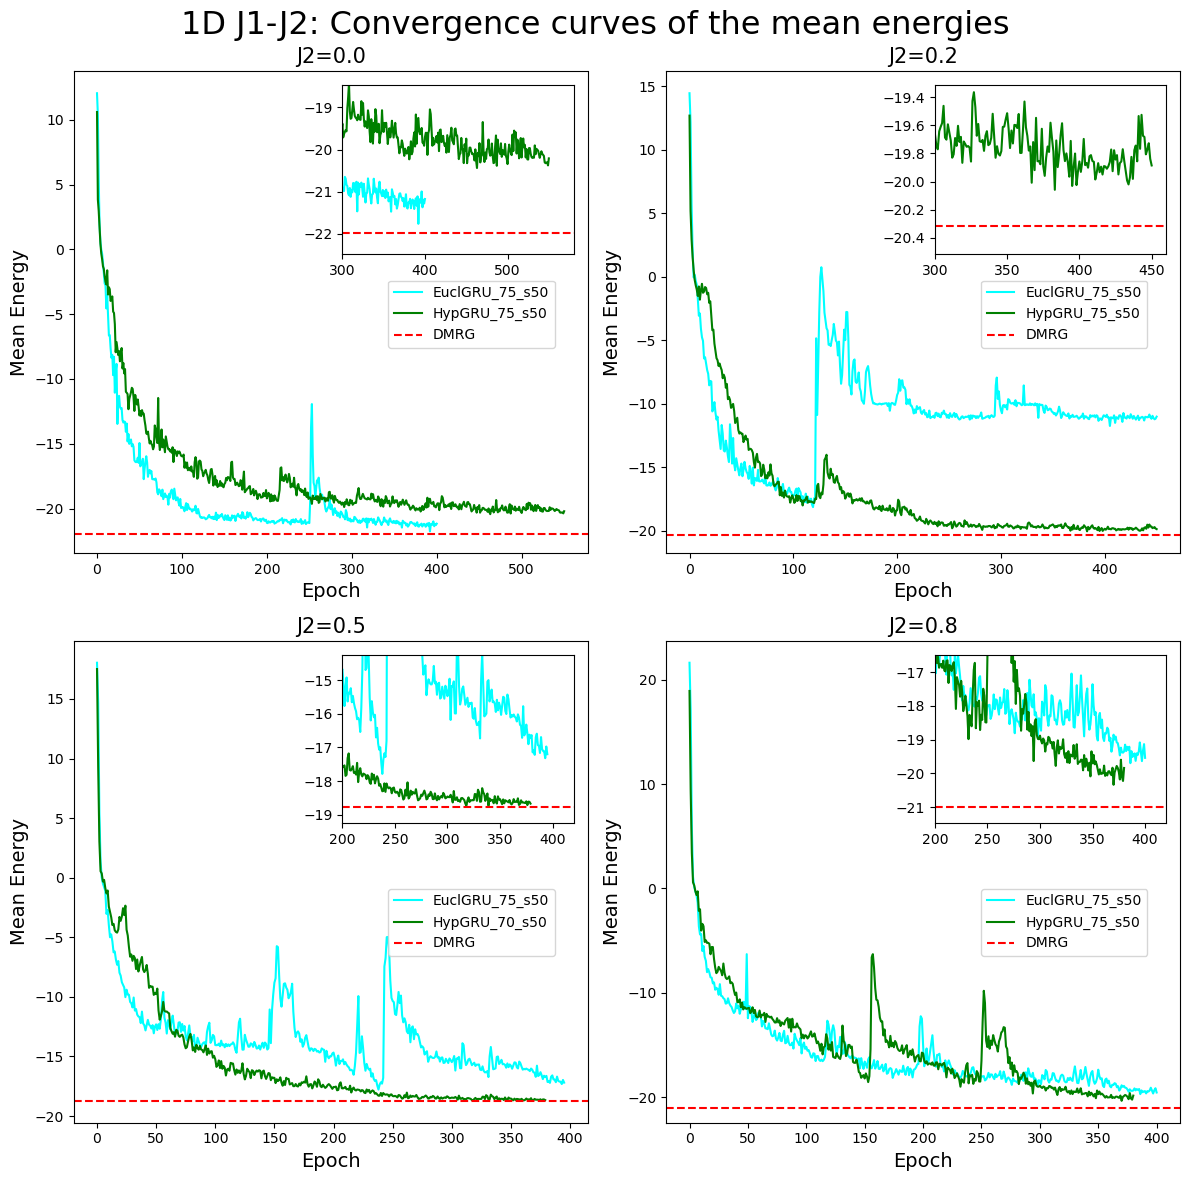

In [127]:
fig, ax = plt.subplots(2,2, figsize=(12, 12), tight_layout=True)
#e_list00 = [mE00_75, mEh00_75, mEh00_60]
#e_names00 = ['EuclGRU_75_s50',  'HypGRU_75_s50','HypGRU_60_s50']
e_list00 = [mE00_75, mEh00_75]
e_names00 = ['EuclGRU_75_s50',  'HypGRU_75_s50']

#e_list02 = [mE02_75,  mEh02_75, mE02_70,   mEh02_70,]
#e_names02 = ['EuclGRU_75_s50', 'HypGRU_75_s50','EuclGRU_70_s50','HypGRU_70_s50']
e_list02 = [mE02_75,  mEh02_75, ]
e_names02 = ['EuclGRU_75_s50', 'HypGRU_75_s50']

e_list05 = [mE05_75[:-5], mEh05_70]
e_names05 = ['EuclGRU_75_s50', 'HypGRU_70_s50']

e_list08 = [mE08_75, mEh08_75[:-20]]
e_names08 = ['EuclGRU_75_s50', 'HypGRU_75_s50']

plot_res_meanE(ax[0,0], Ee00, e_list00, e_names00, 0.0, [300,580, Ee00-0.5, Ee00+3.5], (0.15, 0.38, 0.8, 0.2))
plot_res_meanE(ax[0,1], Ee02, e_list02, e_names02, 0.2, [300,460, Ee02-0.2, Ee02+1.], (0.15, 0.38, 0.8, 0.2))
plot_res_meanE(ax[1,0], Ee05, e_list05, e_names05, 0.5, [200,420,Ee05-0.5, Ee05+4.5], (0.15, 0.3, 0.8, 0.2))
plot_res_meanE(ax[1,1], Ee08, e_list08, e_names08, 0.8, [200,420,Ee08-0.5, Ee08+4.5], (0.15, 0.3, 0.8, 0.2))

plt.suptitle('1D J1-J2: Convergence curves of the mean energies', fontsize = 23)
plt.savefig('1D-J1-J2-N=50.png')

/var/folders/cj/1sxs7wzx40l7609nvj0b33c40000gn/T/ipykernel_9871/4092066487.py:21: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig('1D-J1-J2-N=50-var.png')


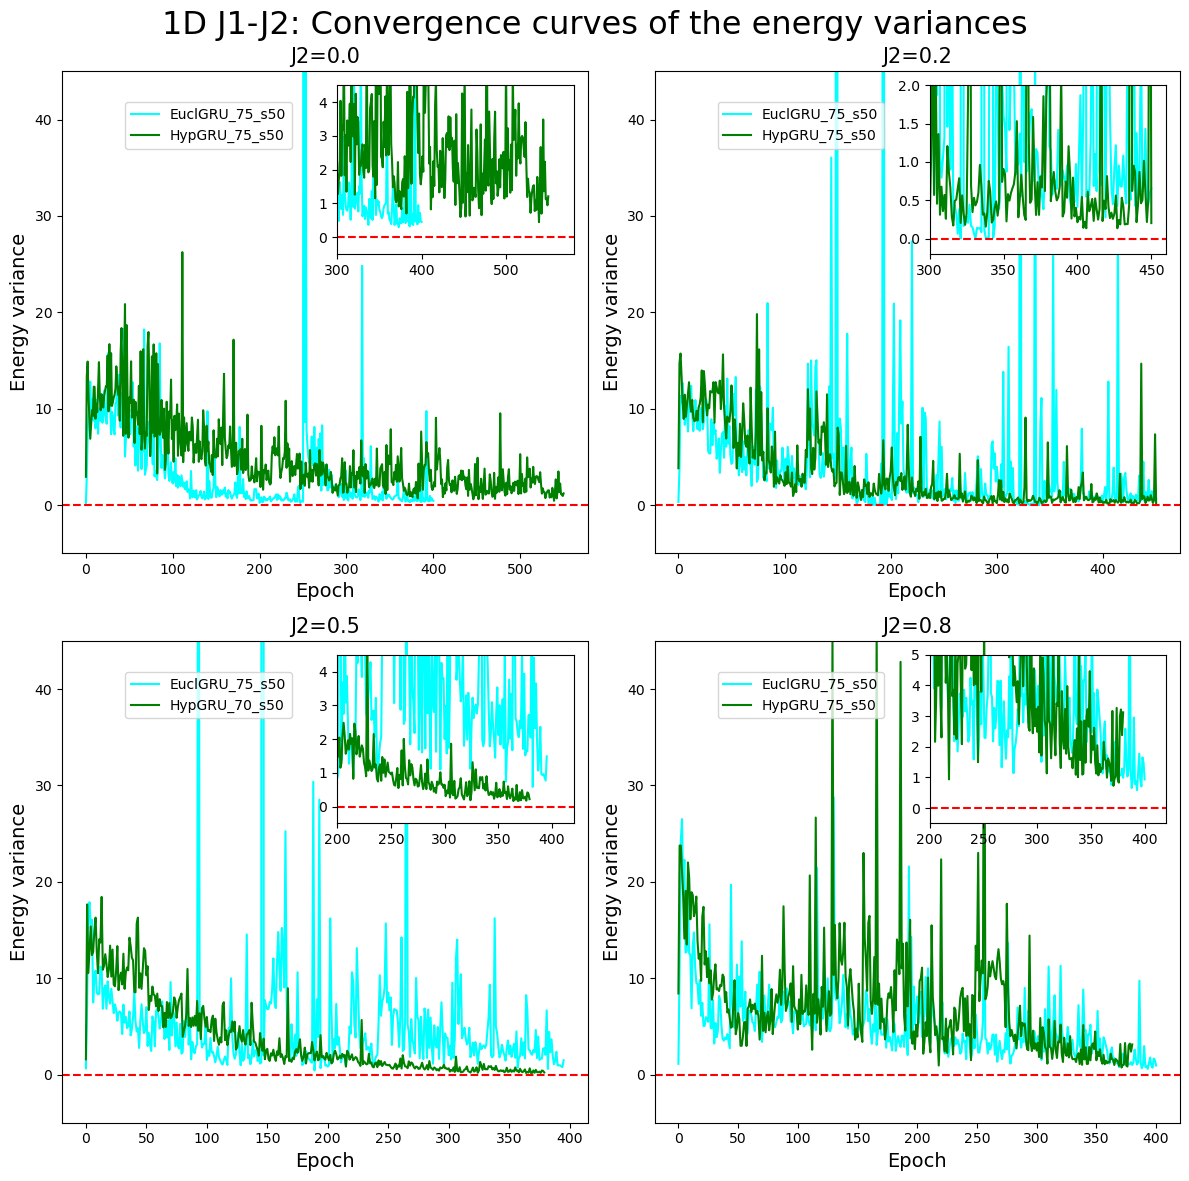

In [173]:
fig, ax = plt.subplots(2,2, figsize=(12, 12), tight_layout=True)

e_list00 = [vE00_75, vEh00_75]
e_names00 = ['EuclGRU_75_s50',  'HypGRU_75_s50']

e_list02 = [vE02_75,  vEh02_75, ]
e_names02 = ['EuclGRU_75_s50', 'HypGRU_75_s50']

e_list05 = [vE05_75[:-5], vEh05_70]
e_names05 = ['EuclGRU_75_s50', 'HypGRU_70_s50']

e_list08 = [vE08_75, vEh08_75[:-20]]
e_names08 = ['EuclGRU_75_s50', 'HypGRU_75_s50']

plot_res_var(ax[0,0], e_list00, e_names00, 0.0, [300,580, -0.5, 4.5], (0.15, 0.75, 0.3, 0.2))
plot_res_var(ax[0,1], e_list02, e_names02, 0.2, [300,460, -0.2, 2.], (0.15, 0.75, 0.3, 0.2))
plot_res_var(ax[1,0], e_list05, e_names05, 0.5, [200,420,-0.5, 4.5], (0.15, 0.75, 0.3, 0.2))
plot_res_var(ax[1,1], e_list08, e_names08, 0.8, [200,420,-0.5, 5], (0.15, 0.75, 0.3, 0.2))

plt.suptitle('1D J1-J2: Convergence curves of the energy variances', fontsize = 23)
plt.savefig('1D-J1-J2-N=50-var.png')